In [1]:
import tal
import os

# TODO: if you want to follow this tutorial,
# you need to have rendered the scene using the "tal render nlos-z" shell command
# See README.md for more information
# Write here   vvvvvvvvvvvvvvv   the path to your rendered scene
root = 'nlos-z/YYYYMMDD-HHMMSS'

data = tal.io.read_capture(os.path.join(root, 'nlos-z.hdf5'))

In [2]:
# because this is a test scene, we know the hidden geometry
# is located at Z = 1
# this volume_xyz is coplanar to the relay wall (rw) at Z=1
volume_xyz = tal.reconstruct.get_volume_project_rw(data, depths=[1.0,])
print(volume_xyz.shape)

(64, 64, 1, 3)


(4096, 64, 64) float32
HFormat.T_Sx_Sy


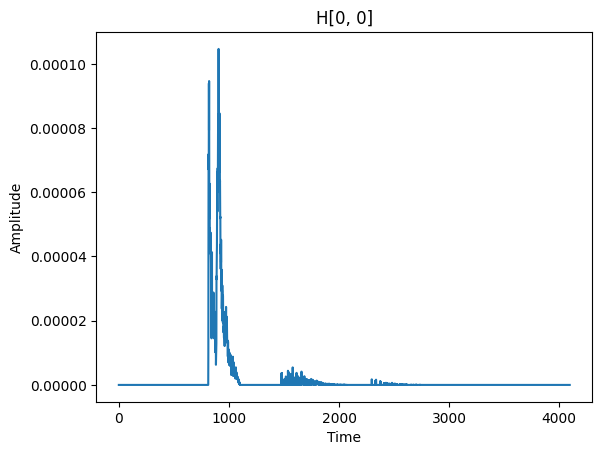

In [3]:
print(data.H.shape, data.H.dtype)
print(data.H_format)
import matplotlib.pyplot as plt
plt.plot(data.H[:, 0, 0])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('H[0, 0]')
plt.show()

In [4]:
tal.reconstruct.pf_dev.convert_data_to_fourier(data, wl_mean=0.06, wl_sigma=0.06, border='zero')

tal.reconstruct.pf_dev: Using 231 wavelengths from 0.0399m to 0.1204m


(231, 64, 64) complex64
HFormat.F_Sx_Sy


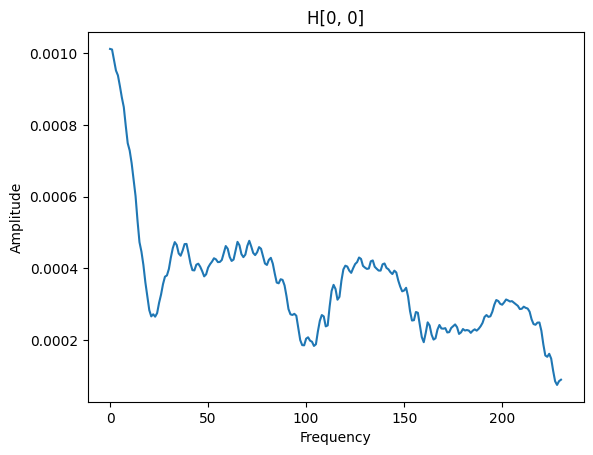

In [5]:
print(data.H.shape, data.H.dtype)
print(data.H_format)
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.abs(data.H[:, 0, 0]))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('H[0, 0]')
plt.show()

tal.reconstruct.utils: Assuming that volume_xyz is X_Y_Z_3
tal.reconstruct.utils: Optimizing for camera convolutions.
tal.reconstruct.pf_dev: Using 231 wavelengths from 0.0399m to 0.1204m
tal.reconstruct.pf_dev: projector_focus_mode=confocal
tal.reconstruct.pf_dev: Skipping FFT for H_0
tal.reconstruct.pf_dev: Will use divide_frequencies implementation


tal.reconstruct.pf_dev divide-frequency: 100%|██████████| 231/231 [00:00<00:00, 301.73it/s]


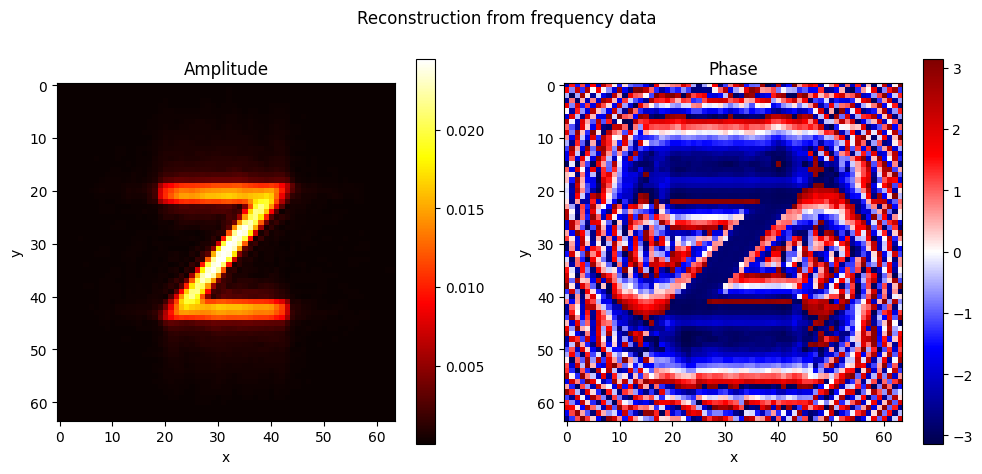

In [6]:
# You need to use pf_dev, not fbp, because the data is in the frequency domain
# VERY IMPORTANT that you pass the same wl_mean/wl_sigma/border as you used in convert_data_to_fourier
H_1 = tal.reconstruct.pf_dev.solve(data,
                                   wl_mean=0.06, wl_sigma=0.06, border='zero',
                                   volume_xyz=volume_xyz, camera_system=tal.enums.CameraSystem.DIRECT_LIGHT)
tal.plot.amplitude_phase(H_1, title='Reconstruction from frequency data')